In [20]:
%pip install pandas pyreadstat
# Bibliotecas
import pandas as pd
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
df = pd.read_csv('df_clean.csv')


C:\Users\camiz\AppData\Local\Temp\ipykernel_23512\2345746417.py:1: DtypeWarning: Columns (3,5,8,12,15,43,44,45,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_clean.csv')


In [53]:
df.head()

,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,nac_fall,cod_pais,sexo,...,area_fall,area_res,causa3,causa,causa103,causa80,causa67A,causa67B,causa4,lc1
0,El Oro,Machala,Machala,1997.0,Mayo,Desconocido,Desconocido,Desconocido,NaN,Hombre,...,Urbana,Urbano,C16 Tumor maligno del estómago,C16 Tumor maligno del estómago,029 Tumor maligno del estomago,027 Tumor maligno del estomago,016 Tumores [neoplasias],018 Resto de tumores malignos,"C169 Tumor maligno del estómago, parte no esp...",9 Neoplasia maligna del estómago
1,El Oro,Arenillas,Arenillas,1997.0,Noviembre,Desconocido,Desconocido,Desconocido,NaN,Hombre,...,Urbana,Urbano,X74 Lesión autoinfligida intencionalmente po...,X74 Lesión autoinfligida intencionalmente po...,101 Lesiones autoinfligidas intencionalmente,078 Lesiones autoinfligidas intencionalmente,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,X749 Lesión autoinfligida intencionalmente po...,63 Lesiones autoinflingidas intencionalmente (...
2,El Oro,El Guabo,El Guabo,1997.0,Marzo,Desconocido,Desconocido,Desconocido,NaN,Mujer,...,Urbana,Urbano,G03 Meningitis debida a otras causas y a las...,G03 Meningitis debida a otras causas y a las...,059 Meningitis,049 Meningitis,026 Enfermedades del sistema nervioso,027 Meningitis,"G039 Meningitis, no especificada",5 Meningitis
3,El Oro,El Guabo,El Guabo,1997.0,Diciembre,Desconocido,Desconocido,Desconocido,NaN,Hombre,...,Urbana,Urbano,"A16 Tuberculosis respiratoria, no confirmada...","A16 Tuberculosis respiratoria, no confirmada...",005 Tuberculosis respiratoria,004 tuberculosis respiratorias,001 Ciertas enfermedades infecciosas y parasit...,004 Tuberculosis,"A162 Tuberculosis de pulmón, sin mención de c...",2 Tuberculosis
4,El Oro,Pasaje,Pasaje,1997.0,Noviembre,Desconocido,Desconocido,Desconocido,NaN,Hombre,...,Urbana,Urbano,W69 Ahogamiento y sumersión mientras se está...,W69 Ahogamiento y sumersión mientras se está...,098 Ahogamiento y sumersión accidentales,075 Ahogamiento y sumersion accidentales,060 Causas externas de morbilidad y de mortalidad,062 Ahogamiento y sumersión accidentales,W698 Ahogamiento y sumersión mientras se está...,60 Ahogamiento y sumersión accidentales


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255110 entries, 0 to 1255109
Data columns (total 49 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   prov_insc   1252890 non-null  object 
 1   cant_insc   1252890 non-null  object 
 2   parr_insc   1252890 non-null  object 
 3   anio_insc   1255110 non-null  object 
 4   mes_insc    1255110 non-null  object 
 5   dia_insc    1255110 non-null  object 
 6   fecha_insc  1255110 non-null  object 
 7   nac_fall    1255110 non-null  object 
 8   cod_pais    348675 non-null   object 
 9   sexo        1255110 non-null  object 
 10  anio_nac    1255110 non-null  float64
 11  mes_nac     1255110 non-null  object 
 12  dia_nac     1255110 non-null  object 
 13  anio_fall   1255110 non-null  float64
 14  mes_fall    1255110 non-null  object 
 15  dia_fall    1255110 non-null  object 
 16  fecha_fall  1255110 non-null  object 
 17  cod_edad    1255110 non-null  object 
 18  edad        1255110 no

In [5]:
columns_to_keep = ['sexo', 'area_fall', 'lc1']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_prueba3 = df_selected.sample(frac=0.2, random_state=40);

In [7]:
from kmodes.kmodes import KModes
# Determinamos el valor óptimo de K

cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba3)
  cost_red.append(kmode_red.cost_)

In [8]:
df_prueba3['sexo'] = df_prueba3['sexo'].astype(str)
df_prueba3['area_fall'] = df_prueba3['area_fall'].astype(str)
df_prueba3['lc1'] = df_prueba3['lc1'].astype(str)

# Fit the KModes model
kmode_red.fit_predict(df_prueba3)

array([0, 1, 1, ..., 1, 7, 0], dtype=uint16)

In [9]:
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba3)
  cost_red.append(kmode_red.cost_)

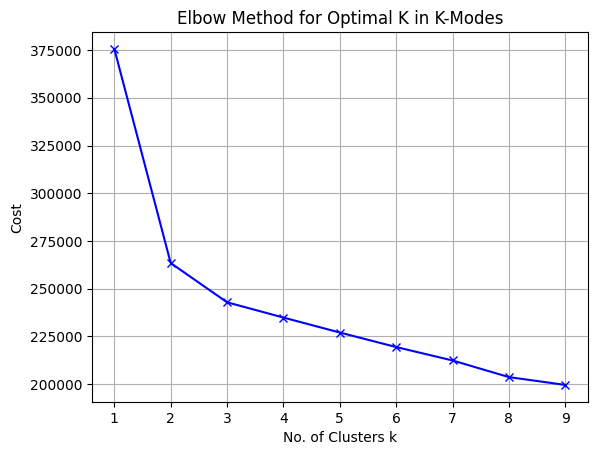

In [10]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

In [11]:
n_clusters = 3
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_3 = km.fit_predict(df_prueba3)
clusters_3

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 259247.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9843, cost: 261630.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 10619, cost: 259862.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 11911, cost: 241936.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 13394, cost: 261886.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 12778, cost: 261115.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 258371.0
Init: initializing centroids
Init: initializing clusters
Starting itera

array([1, 0, 0, ..., 0, 1, 1], dtype=uint16)

In [12]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster3 = df_prueba3.copy()
df_FCluster3.insert(3,"cluster_labels", clusters_3)


In [13]:
df_FCluster3

,sexo,area_fall,lc1,cluster_labels
935151,Hombre,Urbana,47 Enfermedades crónicas de las vías respirato...,1
175592,Mujer,Urbana,9 Neoplasia maligna del estómago,0
861969,Mujer,Urbana,25 Neoplasias benignas in situ y de comportami...,0
811518,Mujer,Urbana,26 Diabetes Mellitus,0
1062163,Mujer,Urbana,57 Accidentes de transporte terrestre,0
...,...,...,...,...
1203391,Mujer,Rural,"41 Insuficiencia cardíaca, complicaciones y en...",0
164562,Hombre,Urbana,51 Cirrosis y otras enfermedades del hígado,1
1082784,Mujer,Rural,"56 Malformaciones congénitas, deformidades y a...",0
1051014,Hombre,Urbana,57 Accidentes de transporte terrestre,1


In [14]:
import gower
from sklearn.metrics import silhouette_score
# Reduce the size of the dataset by randomly sampling a smaller portion of the data
df_sample = df_FCluster3.sample(frac=0.2, random_state=42)

# Calculate the Gower distances using the sampled dataset
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calculate the Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 3:", silhouette_avg_gower)

Average Categorical Silhouette Score with K = 3: 0.41734275


In [15]:
df_prueba3

,sexo,area_fall,lc1
935151,Hombre,Urbana,47 Enfermedades crónicas de las vías respirato...
175592,Mujer,Urbana,9 Neoplasia maligna del estómago
861969,Mujer,Urbana,25 Neoplasias benignas in situ y de comportami...
811518,Mujer,Urbana,26 Diabetes Mellitus
1062163,Mujer,Urbana,57 Accidentes de transporte terrestre
...,...,...,...
1203391,Mujer,Rural,"41 Insuficiencia cardíaca, complicaciones y en..."
164562,Hombre,Urbana,51 Cirrosis y otras enfermedades del hígado
1082784,Mujer,Rural,"56 Malformaciones congénitas, deformidades y a..."
1051014,Hombre,Urbana,57 Accidentes de transporte terrestre


In [16]:
df_categorical = pd.get_dummies(df_prueba3)
df_categorical

,sexo_Hombre,sexo_Mujer,area_fall_Rural,area_fall_Urbana,lc1_1 Enfermedades infecciosas intestinales,"lc1_10 Neoplasia maligna del colon, sigmoide, recto y ano",lc1_100.0,lc1_101.0,lc1_11 Neoplasia maligna del hígado y de las vías biliares,lc1_12 Neoplasia maligna de la vesícula biliar y de otras,...,lc1_59 Disparo de arma de fuego no intencional,lc1_6 Septicemia,lc1_60 Ahogamiento y sumersión accidentales,lc1_61 Accidentes que obstruyen la respiración,lc1_62 Envenenamiento accidental,lc1_63 Lesiones autoinflingidas intencionalmente (Suicidio),lc1_65 Eventos de intención no determinada,lc1_7 Enfermedad por virus de la inmunodeficiencia (VIH),lc1_8 Neoplasia maligna del esófago,lc1_9 Neoplasia maligna del estómago
935151,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
175592,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
861969,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
811518,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1062163,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203391,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
164562,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1082784,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1051014,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
%pip install prince

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/415.6 kB ? eta -:--:--
    --------------------------------------- 10.2/415.6 kB ? eta -:--:--
   -- ------------------------------------ 30.7/415.6 kB 325.1 kB/s eta 0:00:02
   ------ -------------------------------- 71.7/415.6 kB 563.7 kB/s eta 0:00:01
   --------- ---------------------------- 102.4/415.6 kB 737.3 kB/s eta 0:00:01
   ----------- -------------------------- 122.9/415.6 kB 599.1 kB/s eta 0:00:01
   ------------- ------------------------ 143.4/415.6 kB 568.9 kB/s eta 0:00:01
   ---------------- --------------------- 184.3/415.6 kB 619.5 kB/s eta 0:00:01
   -------------------- ----------------- 225.3/415.6 kB 655.6 kB/s eta 0:00:01
   --------------------- ---------------- 235.5/415.6 kB 627.5 kB/s eta 0:00:01
   ------------------------ ------------- 266.2/415.6 kB 606.6 kB/s eta 0:00:01
   ------------------------ ------------- 266.2/415.6 kB 60

In [18]:
# Indicamos el número de componentes que requerimos
import prince
mca = prince.MCA(n_components=5)
# Ajustamos MCA a nuestros datos
mca = mca.fit(df_categorical)
mca
# Transforme el conjunto de datos (esto le dará las coordenadas de cada muestra en los nuevos ejes)
mca_coordinates = mca.transform(df_categorical)
mca_coordinates

,0,1,2,3,4
935151,0.130904,-0.074530,0.119187,0.086104,0.055793
175592,-0.177272,0.006232,0.054033,-0.006851,0.039375
861969,-0.205787,-0.029612,0.053066,0.033598,0.243988
811518,-0.221979,-0.042584,0.115655,-0.162335,-0.163695
1062163,-0.110870,-0.017137,0.043819,0.029234,0.010168
...,...,...,...,...,...
1203391,-0.093237,0.469546,-0.041021,-0.062363,0.174137
164562,0.140580,-0.117659,-0.012990,0.114815,0.067837
1082784,-0.095691,0.404195,-0.016130,0.036247,0.226483
1051014,0.198458,-0.092701,0.043921,0.030947,0.005040


In [19]:
# Agregamos una columna con la etiqueta de los clusters. K = 2
mca_coordinates['cluster_labels'] = df_FCluster3['cluster_labels']
mca_coordinates

,0,1,2,3,4,cluster_labels
935151,0.130904,-0.074530,0.119187,0.086104,0.055793,1
175592,-0.177272,0.006232,0.054033,-0.006851,0.039375,0
861969,-0.205787,-0.029612,0.053066,0.033598,0.243988,0
811518,-0.221979,-0.042584,0.115655,-0.162335,-0.163695,0
1062163,-0.110870,-0.017137,0.043819,0.029234,0.010168,0
...,...,...,...,...,...,...
1203391,-0.093237,0.469546,-0.041021,-0.062363,0.174137,0
164562,0.140580,-0.117659,-0.012990,0.114815,0.067837,1
1082784,-0.095691,0.404195,-0.016130,0.036247,0.226483,0
1051014,0.198458,-0.092701,0.043921,0.030947,0.005040,1


In [20]:
%pip install seaborn
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 325.1 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 544.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 847.9 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 908.0 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.9 kB 915.1 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 846.9 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/294.9 kB 785.2 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 759.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not write

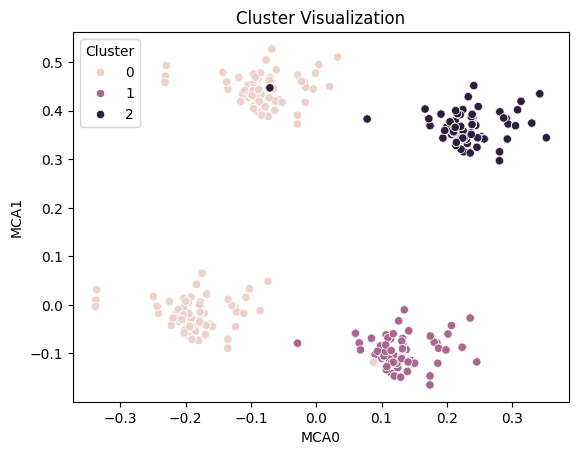

In [21]:
# Dibujamos los clusters
import seaborn as sns
import matplotlib.pyplot as plt

# Dibuja el diagrama de dispersión coloreando los puntos por grupo.

sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0], y=mca_coordinates.iloc[:, 1], hue='cluster_labels')

# Agregar una leyenda
plt.legend(title='Cluster')

# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Show the plot
plt.show()

Cami

In [22]:
columns_to_keep = ['sexo', 'edad', 'etnia', 'est_civil', 'niv_inst', 'area_res', 'lc1']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_prueba4 = df_selected.sample(frac=0.2, random_state=40);

In [23]:
# Convert columns with mixed data types to string
df_prueba4['sexo'] = df_prueba4['sexo'].astype(str)
df_prueba4['edad'] = df_prueba4['edad'].astype(str)
df_prueba4['etnia'] = df_prueba4['etnia'].astype(str)
df_prueba4['est_civil'] = df_prueba4['est_civil'].astype(str)
df_prueba4['niv_inst'] = df_prueba4['niv_inst'].astype(str)
df_prueba4['area_res'] = df_prueba4['area_res'].astype(str)
df_prueba4['lc1'] = df_prueba4['lc1'].astype(str)


# Fit the KModes model
kmode_red.fit_predict(df_prueba4)

array([0, 1, 5, ..., 1, 0, 8], dtype=uint16)

In [25]:
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba4)
  cost_red.append(kmode_red.cost_)

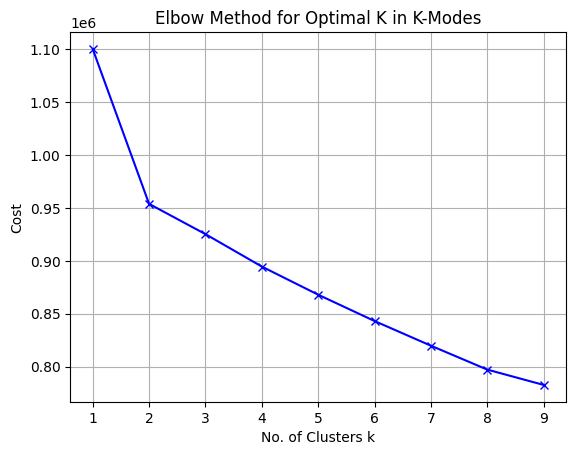

In [26]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

In [27]:
n_clusters = 4
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_4 = km.fit_predict(df_prueba3)
clusters_4

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 994, cost: 244880.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 14846, cost: 233226.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2543, cost: 321796.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1025, cost: 237907.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 14513, cost: 254824.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 38521, cost: 246704.0
Run 6, iteration: 2/100, moves: 0, cost: 246704.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 15502, cost: 234351.0
Init: initializi

array([0, 3, 3, ..., 2, 1, 0], dtype=uint16)

In [28]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster4 = df_prueba4.copy()
df_FCluster4.insert(7 ,"cluster_labels", clusters_4)

In [29]:
import gower
from sklearn.metrics import silhouette_score
# Reduce the size of the dataset by randomly sampling a smaller portion of the data
df_sample = df_FCluster4.sample(frac=0.2, random_state=42)

# Calculate the Gower distances using the sampled dataset
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calculate the Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 4:", silhouette_avg_gower)

Average Categorical Silhouette Score with K = 4: 0.09280905


In [30]:
n_clusters = 3
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_3 = km.fit_predict(df_prueba3)
clusters_3

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 347041.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 98911, cost: 259862.0
Run 2, iteration: 2/100, moves: 0, cost: 259862.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 11732, cost: 243276.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 265248.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 364225.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 118793, cost: 254991.0
Run 6, iteration: 2/100, moves: 0, cost: 254991.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, mo

array([1, 0, 0, ..., 0, 1, 1], dtype=uint16)

In [31]:
df_FCluster3 = df_prueba4.copy()
df_FCluster3.insert(7 ,"cluster_labels", clusters_3)

In [32]:
df_FCluster3

,sexo,edad,etnia,est_civil,niv_inst,area_res,lc1,cluster_labels
935151,Hombre,75.0,Mestizo,Casado(a),Superior,Urbano,47 Enfermedades crónicas de las vías respirato...,1
175592,Mujer,48.0,Desconocido,Soltero(a),Primaria,Urbano,9 Neoplasia maligna del estómago,0
861969,Mujer,85.0,Blanco,Viudo(a),Primaria,Urbano,25 Neoplasias benignas in situ y de comportami...,0
811518,Mujer,51.0,Mestizo,Soltero(a),Superior,Urbano,26 Diabetes Mellitus,0
1062163,Mujer,17.0,Mestizo,Soltero(a),Educación Básica,Urbano,57 Accidentes de transporte terrestre,0
...,...,...,...,...,...,...,...,...
1203391,Mujer,92.0,Mestizo,Divorciado(a),Ninguno,Rural,"41 Insuficiencia cardíaca, complicaciones y en...",0
164562,Hombre,60.0,Desconocido,Unido(a),Primaria,Urbano,51 Cirrosis y otras enfermedades del hígado,1
1082784,Mujer,48.0,Sin información,Soltero(a),Ninguno,Rural,"56 Malformaciones congénitas, deformidades y a...",0
1051014,Hombre,41.0,Mestizo,Soltero(a),Primaria,Urbano,57 Accidentes de transporte terrestre,1


In [33]:
import gower
from sklearn.metrics import silhouette_score
# Reduce the size of the dataset by randomly sampling a smaller portion of the data
df_sample = df_FCluster3.sample(frac=0.2, random_state=42)

# Calculate the Gower distances using the sampled dataset
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calculate the Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 3:", silhouette_avg_gower)

Average Categorical Silhouette Score with K = 3: 0.12974305


otro


In [35]:
columns_to_keep = ['muj_fertil', 'lc1', 'autopsia', 'lugar_ocur']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_prueba5 = df_selected.sample(frac=0.2, random_state=40);

In [36]:
# Convert columns with mixed data types to string
df_prueba5['muj_fertil'] = df_prueba5['muj_fertil'].astype(str)
df_prueba5['autopsia'] = df_prueba5['autopsia'].astype(str)
df_prueba5['lc1'] = df_prueba5['lc1'].astype(str)
df_prueba5['lugar_ocur'] = df_prueba5['lugar_ocur'].astype(str)

# Fit the KModes model
kmode_red.fit_predict(df_prueba5)

array([1, 0, 4, ..., 5, 3, 0], dtype=uint16)

In [37]:
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba3)
  cost_red.append(kmode_red.cost_)

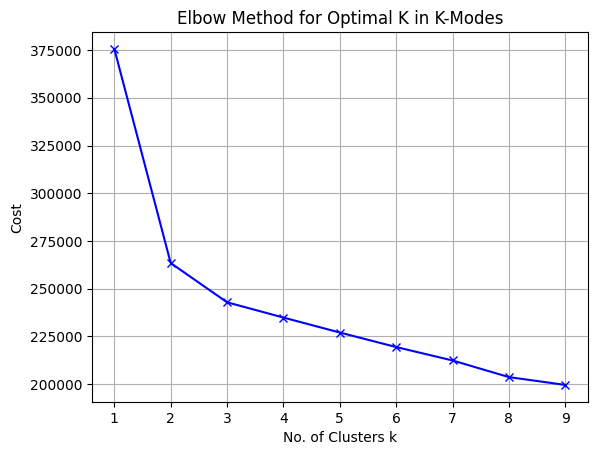

In [38]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

In [40]:
n_clusters = 3
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_3 = km.fit_predict(df_prueba5)
clusters_3

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 417169.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12181, cost: 426935.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3965, cost: 406808.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 38002, cost: 407753.0
Run 4, iteration: 2/100, moves: 8993, cost: 407753.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 15142, cost: 395332.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 36400, cost: 407747.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 9803, cost: 396592.0
Init: initializ

array([0, 2, 1, ..., 1, 0, 2], dtype=uint16)

In [41]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster5 = df_prueba5.copy()
df_FCluster5.insert(3,"cluster_labels", clusters_3)

In [42]:
import gower
from sklearn.metrics import silhouette_score
# Reduce the size of the dataset by randomly sampling a smaller portion of the data
df_sample = df_FCluster5.sample(frac=0.2, random_state=42)

# Calculate the Gower distances using the sampled dataset
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calculate the Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 3:", silhouette_avg_gower)


Average Categorical Silhouette Score with K = 3: 0.12654877


otro

In [44]:
columns_to_keep = ['mor_viol', 'lug_viol','fecha_fall','lc1']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_prueba6 = df_selected.sample(frac=0.2, random_state=40);

In [45]:
# Convert columns with mixed data types to string
df_prueba6['mor_viol'] = df_prueba6['mor_viol'].astype(str)
df_prueba6['lug_viol'] = df_prueba6['lug_viol'].astype(str)
df_prueba6['fecha_fall'] = df_prueba6['fecha_fall'].astype(str)
df_prueba6['lc1'] = df_prueba6['lc1'].astype(str)


# Fit the KModes model
kmode_red.fit_predict(df_prueba6)

array([0, 0, 0, ..., 0, 5, 0], dtype=uint16)

In [46]:
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba6)
  cost_red.append(kmode_red.cost_)

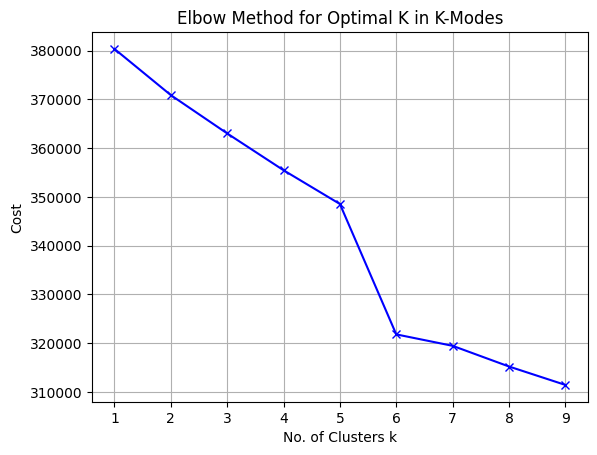

In [47]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

In [49]:
n_clusters = 5
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_5 = km.fit_predict(df_prueba6)
clusters_5

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 124108, cost: 352638.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3128, cost: 339699.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 127279, cost: 355203.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 9, cost: 345730.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3, cost: 343474.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 89, cost: 363838.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 19, cost: 324907.0
Init: initializing centroids
Init: initializing clusters
Starting iteration

array([1, 1, 1, ..., 1, 0, 2], dtype=uint16)

In [51]:
df_FCluster6 = df_prueba6.copy()
df_FCluster6.insert(4,"cluster_labels", clusters_5)

In [52]:
import gower
from sklearn.metrics import silhouette_score
# Reduce the size of the dataset by randomly sampling a smaller portion of the data
df_sample = df_FCluster6.sample(frac=0.2, random_state=42)

# Calculate the Gower distances using the sampled dataset
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calculate the Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 3:", silhouette_avg_gower)


Average Categorical Silhouette Score with K = 3: -0.0051110433


Otro

In [55]:
columns_to_keep = ['niv_inst', 'etnia','lc1', 'est_civil']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_prueba7 = df_selected.sample(frac=0.2, random_state=40);

In [56]:
# Convert columns with mixed data types to string
df_prueba7['niv_inst'] = df_prueba7['niv_inst'].astype(str)
df_prueba7['etnia'] = df_prueba7['etnia'].astype(str)
df_prueba7['est_civil'] = df_prueba7['est_civil'].astype(str)
df_prueba7['lc1'] = df_prueba7['lc1'].astype(str)

# Fit the KModes model
kmode_red.fit_predict(df_prueba7)


array([0, 8, 2, ..., 1, 6, 1], dtype=uint16)

In [57]:
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba7)
  cost_red.append(kmode_red.cost_)

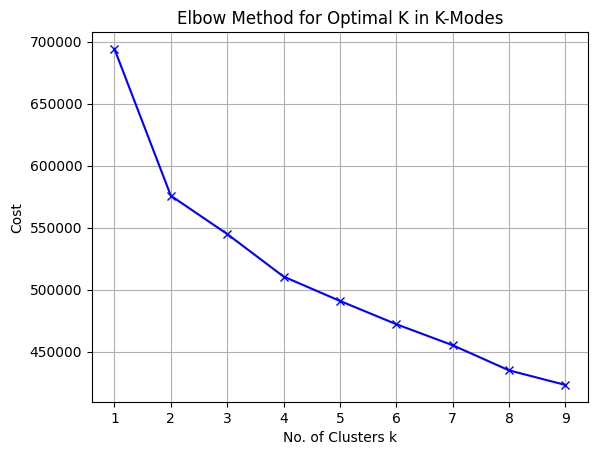

In [58]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

In [59]:
n_clusters = 4
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_4 = km.fit_predict(df_prueba7)
clusters_4

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 35877, cost: 553605.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 50909, cost: 492307.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 38051, cost: 541734.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 64137, cost: 502293.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 64392, cost: 514804.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 30394, cost: 512587.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 15892, cost: 520649.0
Init: initializing centroids
Init: initializing clusters
Start

array([1, 2, 0, ..., 0, 3, 0], dtype=uint16)

In [60]:
df_FCluster4 = df_prueba7.copy()
df_FCluster4.insert(3,"cluster_labels", clusters_4)


In [61]:
import gower
from sklearn.metrics import silhouette_score
# Reduce the size of the dataset by randomly sampling a smaller portion of the data
df_sample = df_FCluster4.sample(frac=0.2, random_state=42)

# Calculate the Gower distances using the sampled dataset
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calculate the Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 4:", silhouette_avg_gower)


Average Categorical Silhouette Score with K = 4: 0.11608277


otro (ESTE MEDIO VALIÓ)

In [22]:
columns_to_keep = ['edad', 'lc1','lugar_ocur', 'area_fall', 'autopsia']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_prueba8 = df_selected.sample(frac=0.2, random_state=40);

In [26]:
from kmodes.kmodes import KModes
# Determinamos el valor óptimo de K

cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba8)
  cost_red.append(kmode_red.cost_)

In [27]:
# Convert columns with mixed data types to string
df_prueba8['edad'] = df_prueba8['edad'].astype(str)
df_prueba8['lugar_ocur'] = df_prueba8['lugar_ocur'].astype(str)
df_prueba8['lc1'] = df_prueba8['lc1'].astype(str)
df_prueba8['area_fall'] = df_prueba8['area_fall'].astype(str)
df_prueba8['autopsia'] = df_prueba8['autopsia'].astype(str)


# Fit the KModes model
kmode_red.fit_predict(df_prueba8)

array([1, 0, 1, ..., 2, 4, 0], dtype=uint16)

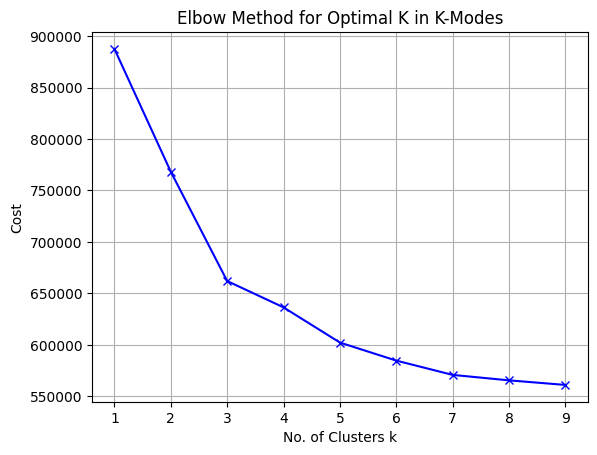

In [28]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

In [29]:
n_clusters = 3
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_3 = km.fit_predict(df_prueba8)
clusters_3

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 33086, cost: 758817.0
Run 1, iteration: 2/100, moves: 13072, cost: 748711.0
Run 1, iteration: 3/100, moves: 135, cost: 748711.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10292, cost: 734647.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 14825, cost: 742409.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 25710, cost: 729268.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 47943, cost: 661975.0
Run 5, iteration: 2/100, moves: 960, cost: 661975.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 1652, cost: 835544.0
Init: initializing centroids
Init: init

array([2, 0, 2, ..., 1, 0, 0], dtype=uint16)

In [30]:
df_FCluster3 = df_prueba8.copy()
df_FCluster3.insert(5,"cluster_labels", clusters_3)


In [31]:
import gower
from sklearn.metrics import silhouette_score
# Reduce the size of the dataset by randomly sampling a smaller portion of the data
df_sample = df_FCluster3.sample(frac=0.2, random_state=42)

# Calculate the Gower distances using the sampled dataset
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calculate the Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 3:", silhouette_avg_gower)


Average Categorical Silhouette Score with K = 3: 0.36105746


In [32]:
n_clusters = 4
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_4 = km.fit_predict(df_prueba8)
clusters_4

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9170, cost: 643277.0
Run 1, iteration: 2/100, moves: 49, cost: 643277.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12697, cost: 735349.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 26992, cost: 719697.0
Run 3, iteration: 2/100, moves: 437, cost: 719697.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 11066, cost: 813412.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 104892, cost: 649530.0
Run 5, iteration: 2/100, moves: 7207, cost: 647410.0
Run 5, iteration: 3/100, moves: 4129, cost: 645396.0
Run 5, iteration: 4/100, moves: 829, cost: 645396.0
Init: initializing centroids
Init: initializing clusters
Starting ite

array([1, 3, 1, ..., 2, 0, 3], dtype=uint16)

In [49]:
df_FCluster4 = df_prueba8.copy()
df_FCluster4.insert(5,"cluster_labels", clusters_4)

In [50]:
import gower
from sklearn.metrics import silhouette_score
# Reduce the size of the dataset by randomly sampling a smaller portion of the data
df_sample = df_FCluster4.sample(frac=0.2, random_state=42)

# Calculate the Gower distances using the sampled dataset
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calculate the Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 4:", silhouette_avg_gower)

Average Categorical Silhouette Score with K = 4: 0.28444108


In [35]:
df_categorical2 = pd.get_dummies(df_prueba8)
df_categorical2

,edad_0.0,edad_1.0,edad_10.0,edad_100.0,edad_101.0,edad_102.0,edad_103.0,edad_104.0,edad_105.0,edad_106.0,...,area_fall_Rural,area_fall_Urbana,autopsia_Desconocido,autopsia_No,autopsia_Si,autopsia_Sin información,area_fautopsiaall_Desconocido,area_fautopsiaall_No,area_fautopsiaall_Si,area_fautopsiaall_Sin información
935151,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
175592,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False
861969,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
811518,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1062163,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203391,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
164562,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False
1082784,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
1051014,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False


In [37]:
# Indicamos el número de componentes que requerimos
import prince
mca = prince.MCA(n_components=2)
# Ajustamos MCA a nuestros datos
mca = mca.fit(df_categorical2)
mca
# Transforme el conjunto de datos (esto le dará las coordenadas de cada muestra en los nuevos ejes)
mca_coordinates = mca.transform(df_categorical2)
mca_coordinates

,0,1
935151,0.154422,-0.006921
175592,-0.114845,-0.087995
861969,0.174752,-0.011005
811518,0.137431,0.019505
1062163,-0.076420,0.440527
...,...,...
1203391,0.094856,-0.032562
164562,-0.095488,-0.087722
1082784,0.090236,0.010934
1051014,-0.128632,0.509523


In [38]:
mca_coordinates['cluster_labels'] = df_FCluster3['cluster_labels']
mca_coordinates

,0,1,cluster_labels
935151,0.154422,-0.006921,2
175592,-0.114845,-0.087995,0
861969,0.174752,-0.011005,2
811518,0.137431,0.019505,1
1062163,-0.076420,0.440527,0
...,...,...,...
1203391,0.094856,-0.032562,1
164562,-0.095488,-0.087722,0
1082784,0.090236,0.010934,1
1051014,-0.128632,0.509523,0


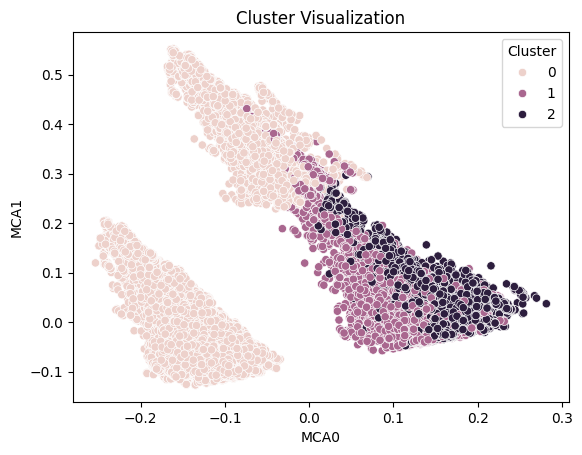

In [39]:
# Dibujamos los clusters
import seaborn as sns
import matplotlib.pyplot as plt

# Dibuja el diagrama de dispersión coloreando los puntos por grupo.

sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0], y=mca_coordinates.iloc[:, 1], hue='cluster_labels')

# Agregar una leyenda
plt.legend(title='Cluster')

# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Show the plot
plt.show()

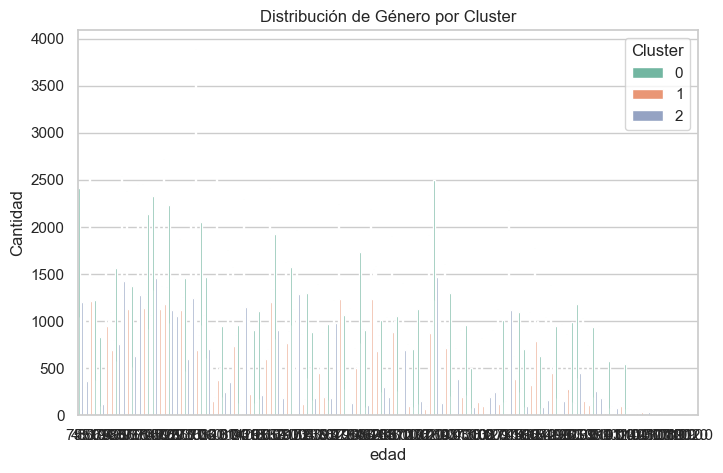

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo del gráfico
sns.set(style="whitegrid")

# Creando el gráfico de barras para la variable 'sexo'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='edad', hue='cluster_labels', data=df_FCluster4, palette='Set2')

# Añadiendo títulos y etiquetas
plt.title('Distribución de Género por Cluster')
plt.xlabel('edad')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')

# Mostrando el gráfico
plt.show()

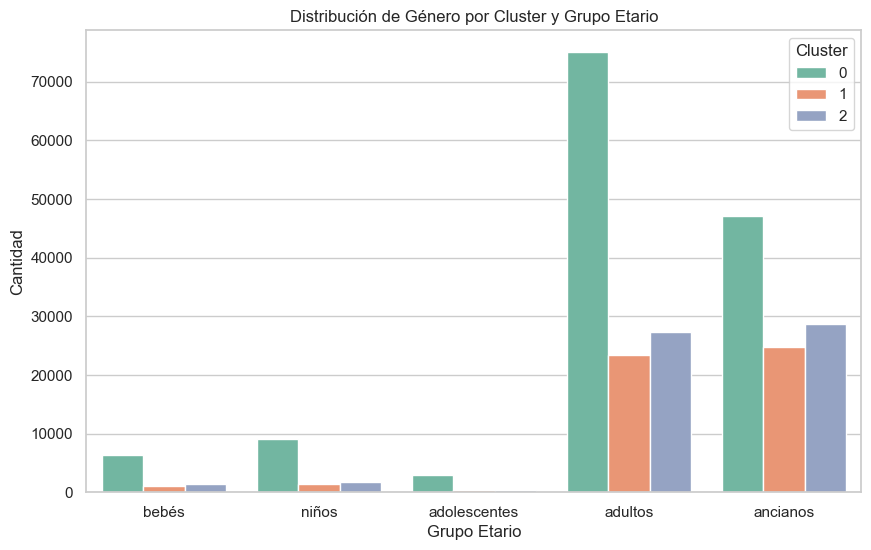

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df_FCluster4 es tu DataFrame y ya está cargado
# Primero, asegurémonos de que la columna 'edad' es de tipo numérico
df_FCluster4['edad'] = pd.to_numeric(df_FCluster4['edad'], errors='coerce')

# Ahora, creemos las categorías de edad
bins = [0, 3, 12, 17, 75, float('inf')]  # Usamos float('inf') para incluir a todos los mayores de 75
labels = ['bebés', 'niños', 'adolescentes', 'adultos', 'ancianos']
df_FCluster4['grupo_etario'] = pd.cut(df_FCluster4['edad'], bins=bins, labels=labels, right=False)

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de barras para la variable 'grupo_etario'
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='grupo_etario', hue='cluster_labels', data=df_FCluster4, palette='Set2')

# Añadir títulos y etiquetas
plt.title('Distribución de Género por Cluster y Grupo Etario')
plt.xlabel('Grupo Etario')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')

# Mostrar el gráfico
plt.show()


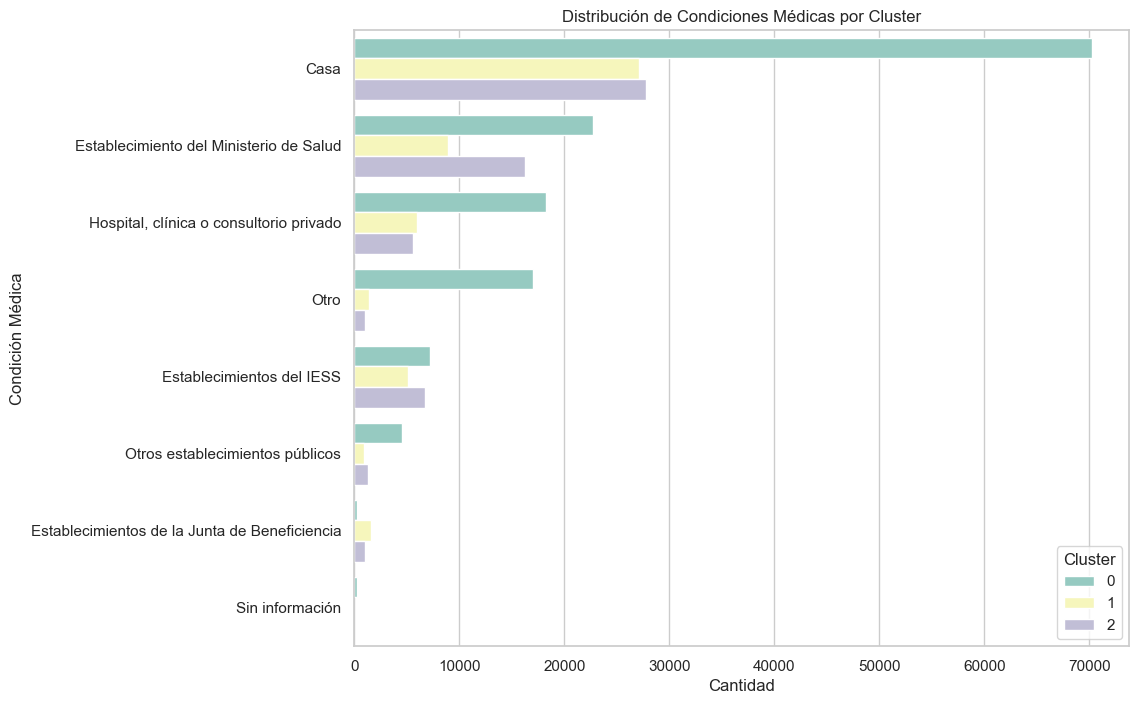

In [45]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(y='lugar_ocur', hue='cluster_labels', data=df_FCluster4, palette='Set3', order=df['lugar_ocur'].value_counts().index)

plt.title('Distribución de Condiciones Médicas por Cluster')
plt.xlabel('Cantidad')
plt.ylabel('Condición Médica')
plt.legend(title='Cluster')

plt.show()

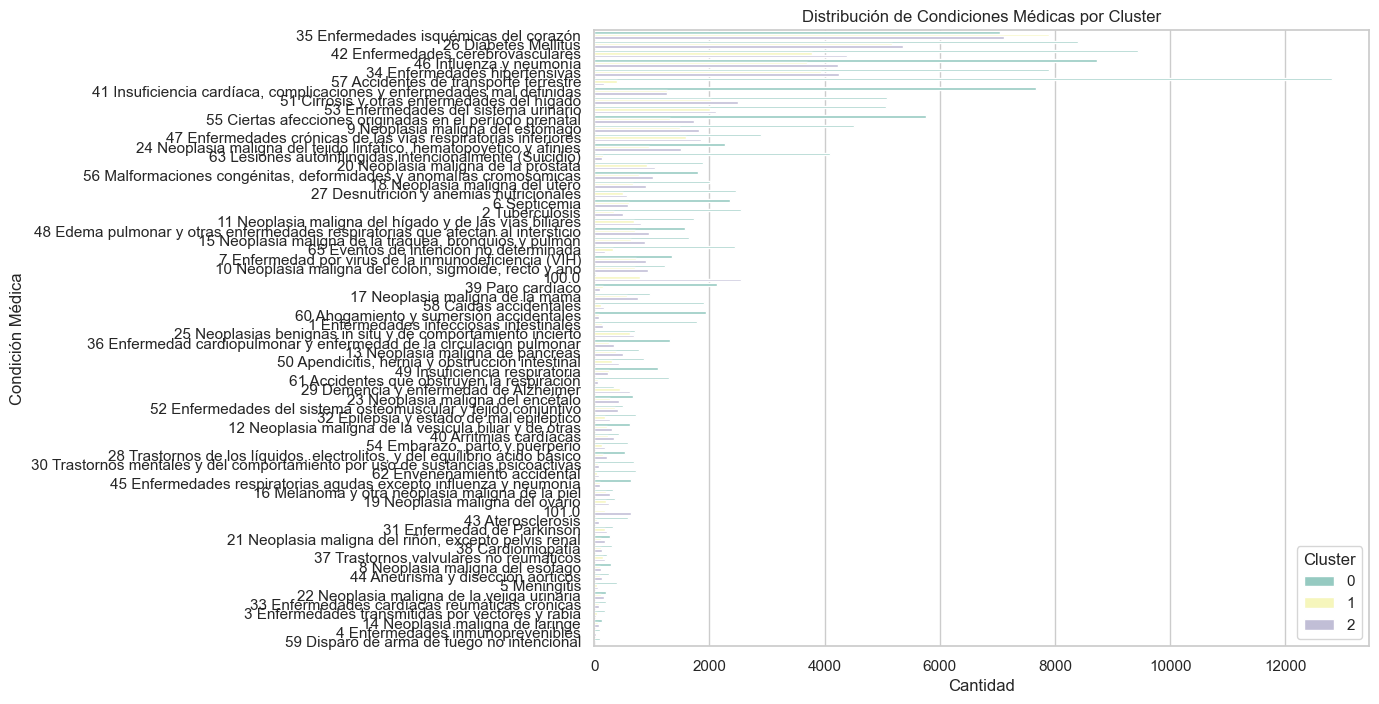

In [46]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(y='lc1', hue='cluster_labels', data=df_FCluster4, palette='Set3', order=df['lc1'].value_counts().index)

plt.title('Distribución de Condiciones Médicas por Cluster')
plt.xlabel('Cantidad')
plt.ylabel('Condición Médica')
plt.legend(title='Cluster')

plt.show()

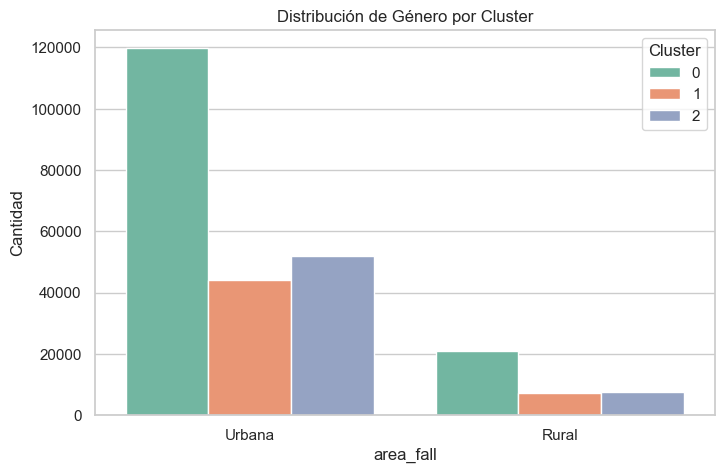

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo del gráfico
sns.set(style="whitegrid")

# Creando el gráfico de barras para la variable 'sexo'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='area_fall', hue='cluster_labels', data=df_FCluster4, palette='Set2')

# Añadiendo títulos y etiquetas
plt.title('Distribución de Género por Cluster')
plt.xlabel('area_fall')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')

# Mostrando el gráfico
plt.show()

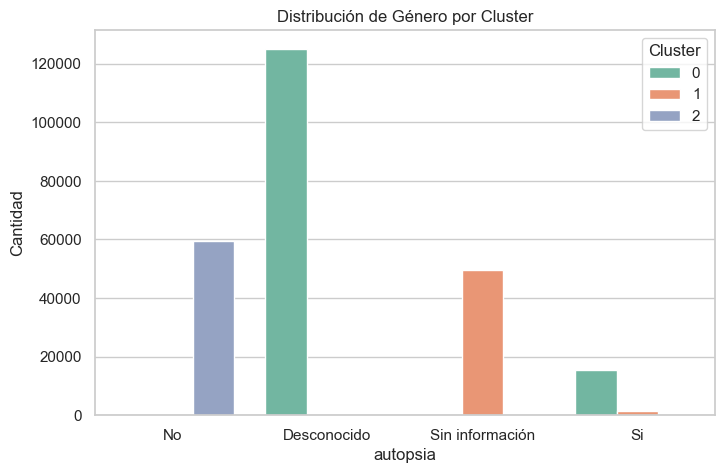

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo del gráfico
sns.set(style="whitegrid")

# Creando el gráfico de barras para la variable 'sexo'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='autopsia', hue='cluster_labels', data=df_FCluster4, palette='Set2')

# Añadiendo títulos y etiquetas
plt.title('Distribución de Género por Cluster')
plt.xlabel('autopsia')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')

# Mostrando el gráfico
plt.show()

In [51]:
mca_coordinates['cluster_labels'] = df_FCluster4['cluster_labels']
mca_coordinates

,0,1,cluster_labels
935151,0.154422,-0.006921,1
175592,-0.114845,-0.087995,3
861969,0.174752,-0.011005,1
811518,0.137431,0.019505,2
1062163,-0.076420,0.440527,0
...,...,...,...
1203391,0.094856,-0.032562,2
164562,-0.095488,-0.087722,3
1082784,0.090236,0.010934,2
1051014,-0.128632,0.509523,0


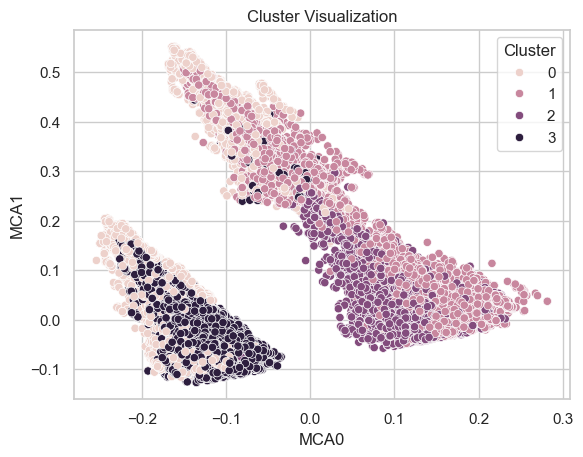

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dibuja el diagrama de dispersión coloreando los puntos por grupo.

sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0], y=mca_coordinates.iloc[:, 1], hue='cluster_labels')

# Agregar una leyenda
plt.legend(title='Cluster')

# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Show the plot
plt.show()

otro final (creo)

In [54]:
columns_to_keep = ['edad', 'lc1','lugar_ocur', 'area_fall', 'autopsia']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_prueba9 = df_selected.sample(frac=0.2, random_state=40);

In [55]:
# Convert columns with mixed data types to string
df_prueba9['edad'] = df_prueba9['edad'].astype(str)
df_prueba9['lugar_ocur'] = df_prueba9['lugar_ocur'].astype(str)
df_prueba9['lc1'] = df_prueba9['lc1'].astype(str)
df_prueba9['area_fall'] = df_prueba9['area_fall'].astype(str)
df_prueba9['autopsia'] = df_prueba9['autopsia'].astype(str)


# Fit the KModes model
kmode_red.fit_predict(df_prueba9)

array([1, 0, 3, ..., 4, 7, 0], dtype=uint16)

In [57]:
import pandas as pd

# Asegurándonos de que la columna 'edad' es de tipo numérico
# Convertir cualquier valor no convertible en NaN y luego eliminar esas filas
df_prueba9['edad'] = pd.to_numeric(df_prueba9['edad'], errors='coerce')

# Puedes optar por eliminar las filas donde 'edad' es NaN si esas filas no son recuperables
df_prueba9.dropna(subset=['edad'], inplace=True)

# Alternativamente, si deseas rellenar los valores NaN con la media o mediana, puedes hacerlo:
# df_prueba9['edad'].fillna(df_prueba9['edad'].median(), inplace=True)

# Ahora aplicamos la segmentación de edad con pd.cut
bins = [0, 3, 12, 17, 75, float('inf')]  # Definir los límites de los grupos de edad
labels = ['bebés', 'niños', 'adolescentes', 'adultos', 'ancianos']
df_prueba9['grupo_etario'] = pd.cut(df_prueba9['edad'], bins=bins, labels=labels, right=False)

# Convertir 'grupo_etario' y otras columnas a tipo string para el modelo k-modes
df_prueba9['grupo_etario'] = df_prueba9['grupo_etario'].astype(str)
df_prueba9['lugar_ocur'] = df_prueba9['lugar_ocur'].astype(str)
df_prueba9['lc1'] = df_prueba9['lc1'].astype(str)
df_prueba9['area_fall'] = df_prueba9['area_fall'].astype(str)
df_prueba9['autopsia'] = df_prueba9['autopsia'].astype(str)

# Continuar con la aplicación del modelo k-modes u otros procesos de análisis
# kmode_red.fit_predict(df_prueba9)


In [58]:
from kmodes.kmodes import KModes
# Determinamos el valor óptimo de K

cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba8)
  cost_red.append(kmode_red.cost_)

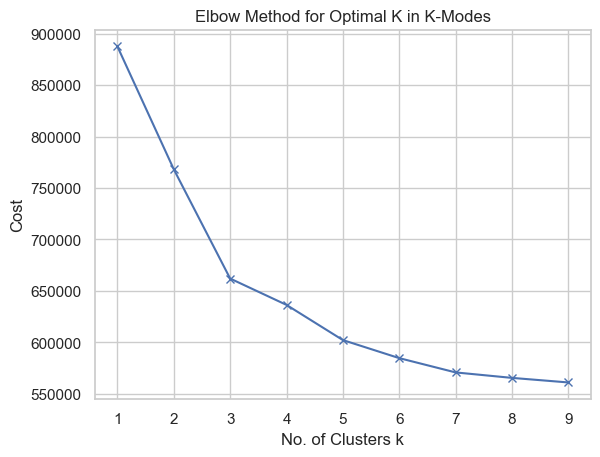

In [59]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

In [60]:
n_clusters = 3
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_3 = km.fit_predict(df_prueba9)
clusters_3

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 42288, cost: 752265.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 46914, cost: 756302.0
Run 2, iteration: 2/100, moves: 5609, cost: 756302.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 29268, cost: 751107.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 71942, cost: 734115.0
Run 4, iteration: 2/100, moves: 875, cost: 734115.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 81787, cost: 737222.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 18101, cost: 799814.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iter

array([0, 2, 0, ..., 2, 1, 0], dtype=uint16)

In [61]:
df_FCluster3 = df_prueba9.copy()
df_FCluster3.insert(5,"cluster_labels", clusters_3)


In [62]:
import gower
from sklearn.metrics import silhouette_score
# Reduce the size of the dataset by randomly sampling a smaller portion of the data
df_sample = df_FCluster3.sample(frac=0.2, random_state=42)

# Calculate the Gower distances using the sampled dataset
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calculate the Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 3:", silhouette_avg_gower)

Average Categorical Silhouette Score with K = 3: 0.1520563
